# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [67]:
df = pd.read_csv("states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [68]:
df.columns
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Math reading for 4th grade>**

How many years of data are logged in our dataset? 

In [69]:
a = df["YEAR"].unique()
b = len(a)
b

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [70]:
M = df.loc[df["STATE"] == "MICHIGAN", "AVG_READING_4_SCORE"]
O = df.loc[df["STATE"] == "OHIO", "AVG_READING_4_SCORE"]
mm = M.mean()
om = O.mean()
dif = mm - om
print(mm - om)
if (dif < 0) :
    print ("Ohio has the higher average reading 4 score outcome across all years.")
else :
    print ("Michigan has the higher average reading 4 score outcome across all years.")

-5.348484848484844
Ohio has the higher average reading 4 score outcome across all years.


Find the average for your outcome score across all states in 2019

In [71]:
data1 = df[["AVG_READING_4_SCORE","YEAR"]]
C = data1[data1["YEAR"] == 2019]
print(C.mean())

AVG_READING_4_SCORE     219.792453
YEAR                   2019.000000
dtype: float64


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [72]:
data2 = df["AVG_READING_4_SCORE"]
print(data2.max())

237.0


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

Text(0.5, 1.0, 'expenditure per student get over time')

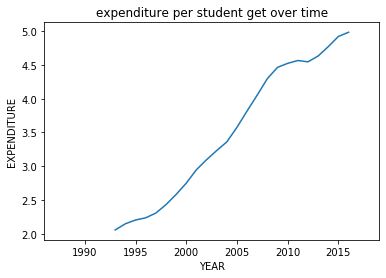

In [73]:
df["EXPENDITURE_PER_STUDENT"] = (df["SUPPORT_SERVICES_EXPENDITURE"] + df["OTHER_EXPENDITURE"]) / df["ENROLL"]
df.groupby('YEAR').EXPENDITURE_PER_STUDENT.mean().plot()
plt.ylabel('EXPENDITURE')
plt.title('expenditure per student get over time')

Feature engineering justification: **The line chart shows the positive relation between the year and expenditure per student get over time**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, 'average 4th MATH score over time, by state')

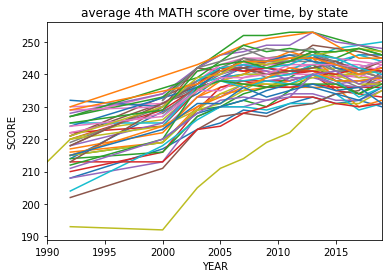

In [74]:
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df.set_index('YEAR').groupby('STATE').AVG_MATH_4_SCORE.plot()
plt.ylabel('SCORE')
plt.title('average 4th MATH score over time, by state')

**<We find that for the most of the states, the average of 4th grade math score had a sudden acceleration.>**

**Visualization 2**

Text(0, 0.5, '4th grade reading score')

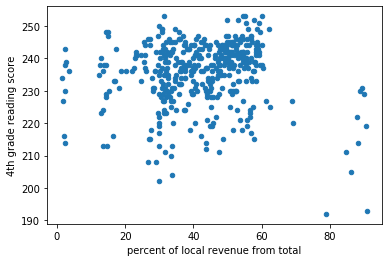

In [75]:
df['Local_percent_revenue'] = df['LOCAL_REVENUE']/df['TOTAL_REVENUE']*100
df.plot.scatter(x='Local_percent_revenue',y='AVG_MATH_4_SCORE')
plt.xlabel('percent of local revenue from total')
plt.ylabel('4th grade reading score')

**<We find that the percentage of the local revenue from the total revenue will may not have a good effects on the average, even there are 80% of the total revenue from local revenue, the score of 4th grade math score but reached the lowest point.  >**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
# X =
# y = 
X = df[['ENROLL','AVG_MATH_4_SCORE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_8_SCORE']
y.fillna(y.mean(), inplace=True)

In [78]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [79]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [80]:
# create your model here
model = LinearRegression()

In [81]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [83]:
print(model.intercept_)
print(model.coef_)
np.mean(model.predict(X_test)-y_test)
model.score(X_test, y_test)

58.920015264173344
[-1.70530918e-07  2.70024462e-01  6.37491092e-01]


0.7889138864194942

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

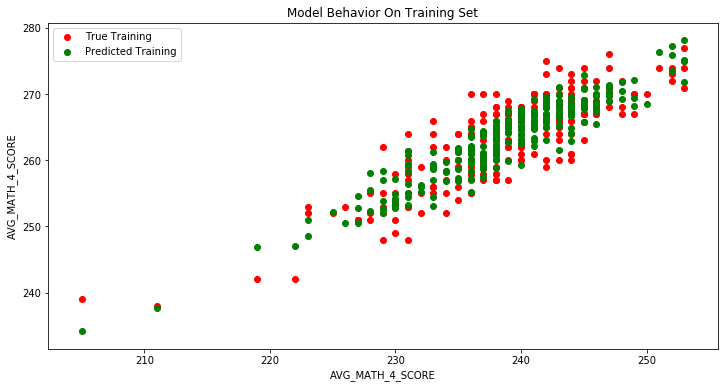

In [84]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR'
col_name = 'AVG_MATH_4_SCORE' 

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

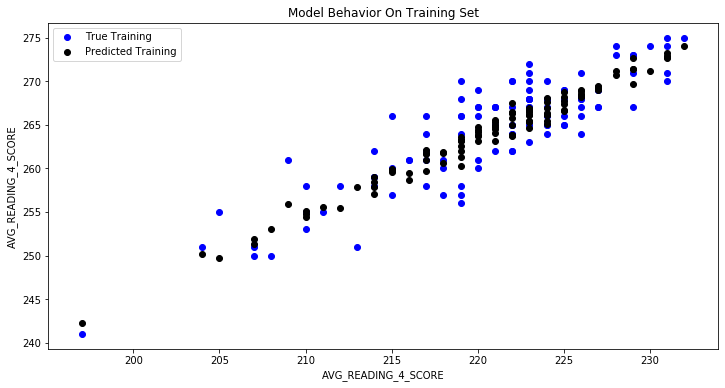

In [85]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR"
col_name = 'AVG_READING_4_SCORE' 
f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")
plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4_SCORE')
plt.title("Model Behavior On Training Set")

<h2> Summary </h2>

**<I think these two models which showed test relationship between the two variables is well presented by linear comparison. Almost all points' predicted training show linear relationships that conform to the true training.These two models shows that the average math of 4th grade and average reading of 4th grade scores are good for the prediction of average reading score of 8th grade. They all show a positive linear relationship.>**